In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
data_dir = '/home/amansinha/Downloads/data/time-series/Le CAC et ses 7 majors 2021-Aman/'
os.listdir(data_dir)

['OR.FR-d-20200701.csv',
 'BNP.FR-d-20200701.csv',
 'MC.FR-d-20200701.csv',
 'AIR.FR-d-20200701.csv',
 'FP.FR-d-20200701.csv',
 'DG.FR-d-20200701.csv',
 'Fra40-20200102.csv',
 'SAN.FR-d-20200701.csv',
 '.DS_Store']

In [5]:
df = pd.read_csv(data_dir + 'BNP.FR-d-20200701.csv', sep=' ', names=['name', 'date', 'time', 'val', 'extra'])
df.drop('extra', axis=1, inplace=True)

df['datetime'] = df[['date', 'time']].agg(' '.join, axis=1)
df['datetime'] = df['datetime'].astype('datetime64[ns]')

df.drop(['date', 'time'], axis=1, inplace=True)
df

,name,val,datetime
0,BNP.FR-d,35.43,2020-01-07 09:00:00
1,BNP.FR-d,35.42,2020-01-07 09:00:15
2,BNP.FR-d,35.42,2020-01-07 09:00:30
3,BNP.FR-d,35.41,2020-01-07 09:00:45
4,BNP.FR-d,35.41,2020-01-07 09:01:00
...,...,...,...
248997,BNP.FR-d,29.94,2020-10-30 17:29:00
248998,BNP.FR-d,29.92,2020-10-30 17:29:15
248999,BNP.FR-d,29.91,2020-10-30 17:29:30
249000,BNP.FR-d,29.91,2020-10-30 17:29:45


<AxesSubplot:xlabel='datetime'>

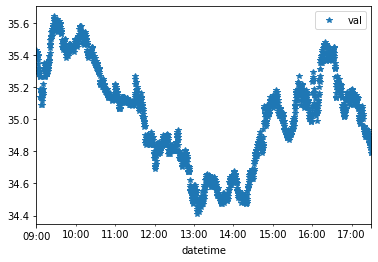

In [6]:
df[:2041].plot(x='datetime', y='val', style='*')

<AxesSubplot:xlabel='datetime'>

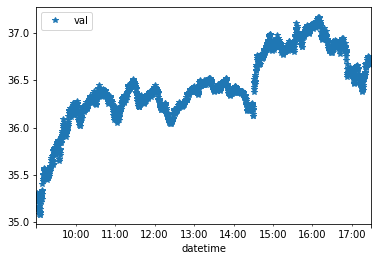

In [5]:
df[2042: 4080].plot(x='datetime', y='val', style='*')

# Time Series Classes

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [8]:
class TSElement(object):
    def __init__(self,dt, val=0):
        self.dt = dt
        self.val = val
        
    def __str__(self):
        string = []
        
        id_dt= self.dt
        string.append(f'Datetime: {self.dt}')
        
        id_val = self.val
        string.append(f'Value : {self.val}')
        
        return string
    
#    def __mean__(self, other):
 #       if (isinstance(other, TSElement)):
  #          return other.val + self.val
        
   #     except AttributeError:          

class TimeSeriesData:
    def __init__(self, df, name, h=3):
        self.name = name
        self.h = h
        self.instances = None
        #self.bs = bs
        
    def __len__(self):
        return len(df) - self.h
    
    def prepare_data(self):
        l = list(zip(df['datetime'],df['val']))
        self.instances  = [[TSElement(*o) for o in l[i:i+self.h]] for i,e in enumerate(l) if (i+self.h) < len(df)]
        print('Size of Dataset:', len(self.instances))
    
    def avg_baseline(self):
        
        predictions = []
        truths = []
        
        for instance in self.instances:
            seq = instance[:-1]
            truths.append(instance[-1].val)
            predictions.append(np.mean([ins.val for ins in seq]))
            
        loss = mean_squared_error(truths, predictions)
        
        return truths, predictions, loss
    
    def knn_reg_baseline(self):
        
        predictions = []
        X,y = [],[]
        
        for instance in self.instances:
            X.append([ins.val for ins in instance[:-1]])
            y.append(instance[-1].val)
        
        
        X_train, X_test, y_train, truths = train_test_split(X, y, test_size=0.33, random_state=42)
        
        neigh = KNeighborsRegressor(n_neighbors=2)
        neigh.fit(X_train, y_train)
        
        predictions = neigh.predict(X_test)
        
        loss = mean_squared_error(predictions, truths)
        
        return truths, predictions, loss
        


# Load class and prepare data

In [12]:

ts = TimeSeriesData(df, name='BNP', h=4)
ts.prepare_data()

Size of Dataset: 248998


# 1. AVG Baseline

In [54]:
# run model 
t,p, loss = ts.avg_baseline()

In [55]:
# uncomment to see 
diff = []
for tt,pp in zip(t,p):
    ## print(tt,pp)
    diff.append(abs(tt-pp))
np.mean(diff)

0.016759190835225507

# sequence length (h-1) vs mean_abs_diff

```
mean Baseline 
```

||h|mean_abs_diff|
|---|---|---|
||4|0.0116019|
||5|0.0126558|
||6|0.0135694|
||7|0.0144012|
||8|0.015213|
||9|0.015998|
||10|0.01675|

## Visualization

In [74]:
import matplotlib.pyplot as plt

100 100 100


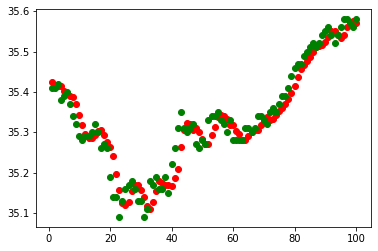

In [84]:
# h = 4 with mean_baseline

x = list(range(1,248999))[:100]
y1 = p[:100]
y2 = t[:100]
print(len(x), len(y1), len(y2))
plt.scatter(x, y1, c = 'red')# prediction
plt.scatter(x, y2, c = 'green')# truth

# 2. KNN regressor -model

In [11]:
# load data
ts = TimeSeriesData(df, name='BNP', h=7)
ts.prepare_data()

data = ts.instances
X,y = [],[]

for instance in data:
    X.append([ins.val for ins in instance[:-1]])
    y.append(instance[-1].val)

Size of Dataset: 248995


In [12]:
featnames = [f'feat{i}' for i in range(ts.h -1)]

datadf = pd.DataFrame(X, columns=featnames)
datadf['y'] = y
datadf

,feat0,feat1,feat2,feat3,feat4,feat5,y
0,35.43,35.42,35.42,35.41,35.41,35.42,35.38
1,35.42,35.42,35.41,35.41,35.42,35.38,35.39
2,35.42,35.41,35.41,35.42,35.38,35.39,35.40
3,35.41,35.41,35.42,35.38,35.39,35.40,35.37
4,35.41,35.42,35.38,35.39,35.40,35.37,35.34
...,...,...,...,...,...,...,...
248990,29.88,29.92,29.93,29.93,29.93,29.95,29.95
248991,29.92,29.93,29.93,29.93,29.95,29.95,29.94
248992,29.93,29.93,29.93,29.95,29.95,29.94,29.92
248993,29.93,29.93,29.95,29.95,29.94,29.92,29.91


In [40]:
# running of small number of samples for shap computation

n_samples = 5000
X_train, X_test, y_train, truths = train_test_split(datadf.iloc[:n_samples,:-1], datadf.iloc[:n_samples,-1], test_size=0.15, random_state=42)

predictions = []

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

predictions = neigh.predict(X_test)

loss = mean_squared_error(predictions, truths)
print(loss)

0.0006525333333333312


# 2.1 Check with shap library

In [9]:
import shap

In [41]:
shap.initjs()

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(neigh.predict, X_train)
shap_values = explainer.shap_values(X_test)#, nsamples=100)
#print(shap_values)


Using 4250 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/750 [00:00<?, ?it/s]

In [42]:
shap_values.shape, len(X_test)

((750, 6), 750)

In [43]:
print('-------- mean|SHAP value| ---------------\n')
for i, msv in enumerate(np.mean(abs(shap_values), 0)):
    print(f'\tfeat{i} = {msv}')

-------- mean|SHAP value| ---------------

	feat0 = 0.09026408067972166
	feat1 = 0.09066769490204918
	feat2 = 0.0969875015163112
	feat3 = 0.1086420536993357
	feat4 = 0.1259399414117243
	feat5 = 0.1503840509281178


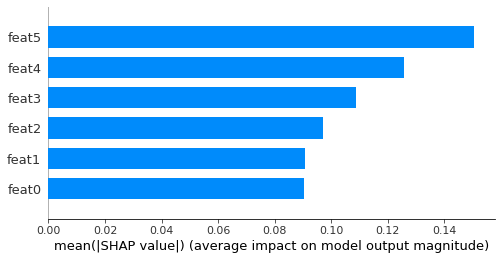

In [44]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

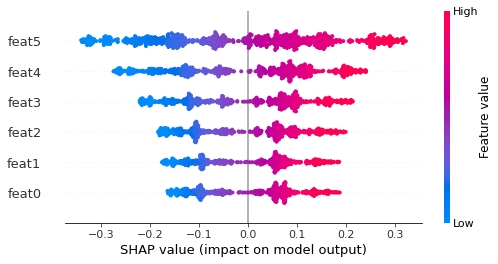

In [45]:
shap.summary_plot(shap_values, X_test)

In [46]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

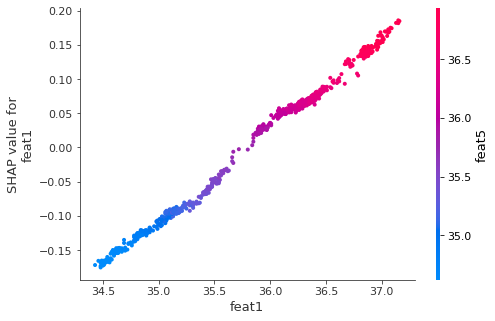

In [47]:
shap.dependence_plot("feat1", shap_values, X_test)

In [48]:
sample_idx = 13
shap.force_plot(explainer.expected_value, shap_values[sample_idx,:], X_test.iloc[sample_idx])

# 2.2 Manual shap implementation

In [2]:
import time
import math
import itertools

$φ_{i}$= $\sum_{S⊆F /\${i}$}^{}$  $\frac{|S|!(|F|−|S|−1)!}{|F|!} $[$f_{S∪{i}}(x_{S ∪ {i}})−f_{S}(x_{S})]$

In [31]:
def k(s,f):
    s = len(s)
    f = len(f)
    return math.factorial(s)* math.factorial(f-s-1) / math.factorial(f)

def blah(s,sui, X_train, Y_trains, X_test, Y_tests, model):
    # s and sui are set of feature indexes
    # copy dataset to two set of features
    # train two models
    # shuffle keep same
    # for any sample in test
    Xs_train = X_train[['feat'+str(i) for i in s]]
    Xsui_train = X_train[['feat'+str(i) for i in sui]]
    
    Xs_test = X_test[['feat'+str(i) for i in s]]
    Xsui_test = X_test[['feat'+str(i) for i in sui]]

    if model != 'rf':
        clfs = KNeighborsRegressor(n_neighbors=2)#RandomForestClassifier(max_depth=2, random_state=0)
        clfsui = KNeighborsRegressor(n_neighbors=2)#RandomForestClassifier(max_depth=2, random_state=0)
    else:
        clfs = RandomForestRegressor(max_depth=2, random_state=0)# s
        clfsui = RandomForestRegressor(max_depth=2, random_state=0)# sui
    
    
    clfs.fit(Xs_train, Y_trains)
    clfsui.fit(Xsui_train, Y_trains)
    
    fsui = clfsui.predict(Xsui_test)
    fs = clfs.predict(Xs_test)
    
    return sum(fsui - fs)

def simulate_shap(nfeat, df, Ys, model='rf'):
    #nfeat = 3
    X = df.iloc[:, 0:nfeat]
    print(X.head())
    shaps = np.zeros(nfeat)
    stuff = [i for i in range(nfeat)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, Ys, test_size=0.15, random_state=42)
    
    print(f"No of features: {nfeat}")
    print(f"Shape of X: {X_train.shape}")
    print(f'Using model: {model}')
    
    subsets = [] 
    for L in range(0, len(stuff)+1):
        for subset in itertools.combinations(stuff, L):
            subsets.append(set(subset))

    times = np.zeros(nfeat)

    t1 = time.time()
    f = {i for i in range(nfeat)}
    for i, sh in enumerate(shaps):
        print(f"Current feat: {i+1}th")

        for s in subsets:

            if not (i in s) and len(s)>0:

                sui = s | {i}
                #print(s, sui)
                # absolute values 
                shaps[i] += k(s,f)* blah(s,sui,X_train, y_train, X_test, y_test, model=model)
                #abs(k(s,f)* blah(s,sui,X_train, y_train, X_test, y_test))
        t2 = time.time()
        times[i] = t2 - t1
        t1 = t2
        
        
    
    return times, shaps

In [13]:
# rf regressor
from sklearn.ensemble import RandomForestRegressor

times, shaps = simulate_shap(6, datadf.iloc[:5000,:-1],datadf.iloc[:5000,-1])

   feat0  feat1  feat2  feat3  feat4  feat5
0  35.43  35.42  35.42  35.41  35.41  35.42
1  35.42  35.42  35.41  35.41  35.42  35.38
2  35.42  35.41  35.41  35.42  35.38  35.39
3  35.41  35.41  35.42  35.38  35.39  35.40
4  35.41  35.42  35.38  35.39  35.40  35.37
No of features: 6
Shape of X: (4250, 6)
Current feat: 1th
Current feat: 2th
Current feat: 3th
Current feat: 4th
Current feat: 5th
Current feat: 6th


In [22]:
# rf regressor
print('-------- mean|SHAP value| ---------------\n')
for i, msv in enumerate(shaps):
    print(f'\tfeat{i} = {abs(msv)}')

-------- mean|SHAP value| ---------------

	feat0 = 0.0281206947620292
	feat1 = 0.022948102152332218
	feat2 = 0.11251124580519291
	feat3 = 0.5146787380926556
	feat4 = 0.6485727781123554
	feat5 = 0.21393840181092388


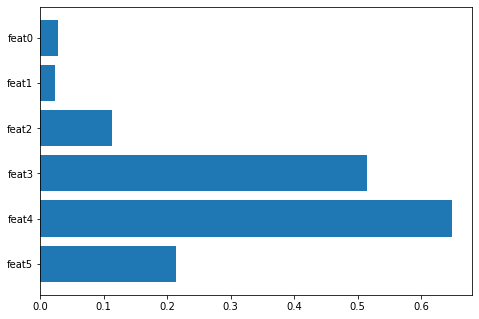

In [24]:
# rf
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(featnames,list(map(abs,shaps)), align='center')
ax.invert_yaxis()
plt.show()

In [32]:
# knn regressor
times, shaps = simulate_shap(6, datadf.iloc[:5000,:-1],datadf.iloc[:5000,-1], model='knn')

   feat0  feat1  feat2  feat3  feat4  feat5
0  35.43  35.42  35.42  35.41  35.41  35.42
1  35.42  35.42  35.41  35.41  35.42  35.38
2  35.42  35.41  35.41  35.42  35.38  35.39
3  35.41  35.41  35.42  35.38  35.39  35.40
4  35.41  35.42  35.38  35.39  35.40  35.37
No of features: 6
Shape of X: (4250, 6)
Using model: knn
Current feat: 1th
Current feat: 2th
Current feat: 3th
Current feat: 4th
Current feat: 5th
Current feat: 6th


In [36]:
# knn regressor
print('-------- mean|SHAP value| ---------------\n')
for i, msv in enumerate(shaps):
    print(f'\tfeat{i} = {abs(msv)}')

-------- mean|SHAP value| ---------------

	feat0 = 0.038083333333314345
	feat1 = 0.14733333333337478
	feat2 = 0.09233333333337321
	feat3 = 0.012166666666716827
	feat4 = 0.07175000000002192
	feat5 = 0.10583333333335457


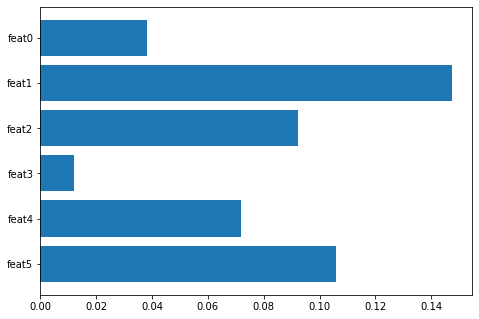

In [38]:
# knn
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(featnames,list(map(abs,shaps)), align='center')
ax.invert_yaxis()
plt.show()